# **Prediction of the price of First Majestic Stock**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('whitegrid')
%matplotlib inline

In [297]:
import yfinance as yf

In [246]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [47]:
# Setting time period for which stock price would be collected 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [56]:
stock_list = ['FR.TO']

In [201]:
# Useful if I have more than one stock
for stock in stock_list:
    globals()[stock] = yf.download(stock, 
                       start=start, 
                       end=end, 
                       progress=False,
                       group_by = 'ticker')

In [202]:
# Stock Dataframe
FR = globals()['FR.TO']
#FR.head()

#### Calculating Moving Average

In [203]:
m_avg = 50
column_name = 'MA for %s days' %str(m_avg)
FR[column_name] = FR['Adj Close'].rolling(window = m_avg, center = True).mean()

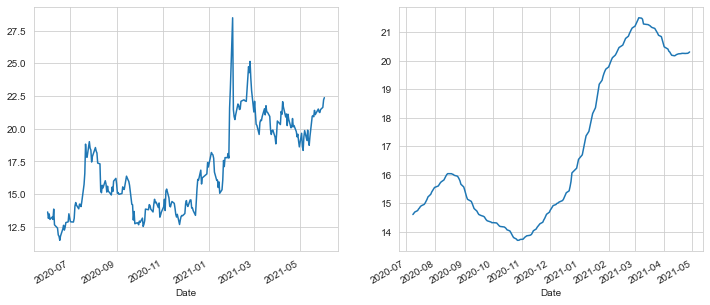

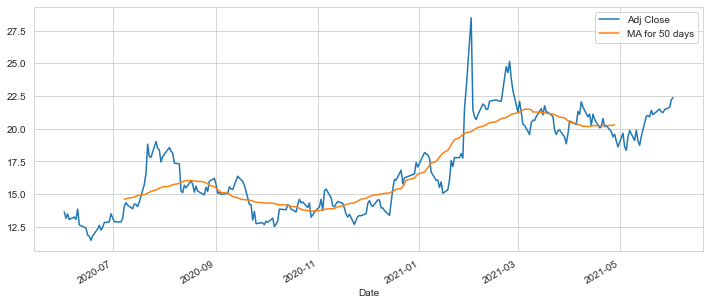

In [204]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#FR[['Adj Close','Move Avg for 50 days']].plot();
FR['Adj Close'].plot(ax = ax[0]);
FR['MA for 50 days'].plot(ax = ax[1]);
FR[['Adj Close','MA for 50 days']].plot(figsize=(12,5));

#### Calculating Daily Return using 'percent change' method

In [210]:
FR

,Open,High,Low,Close,Adj Close,Volume,MA for 50 days,Daily Return
Date,,,,,,,,
2020-06-02,14.580000,14.600000,13.640000,13.640000,13.636361,1667800,NaN,NaN
2020-06-03,13.130000,13.410000,12.720000,13.150000,13.146491,1270700,NaN,-0.035924
2020-06-04,13.430000,13.710000,13.220000,13.490000,13.486401,765400,NaN,0.025856
2020-06-05,12.700000,13.120000,12.350000,13.070000,13.066513,1526800,NaN,-0.031134
2020-06-08,13.280000,13.300000,12.830000,13.250000,13.246465,843500,NaN,0.013772
...,...,...,...,...,...,...,...,...
2021-05-27,21.080000,21.370001,20.450001,21.240000,21.240000,830100,NaN,-0.002817
2021-05-28,21.000000,21.500000,20.940001,21.469999,21.469999,423200,NaN,0.010829
2021-05-31,21.469999,21.790001,21.350000,21.639999,21.639999,176900,NaN,0.007918


In [206]:
FR['Daily Return'] = FR['Adj Close'].pct_change()

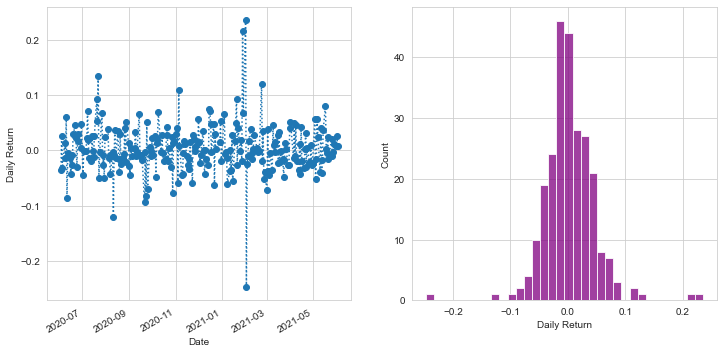

In [207]:
# Using subplots and using the axes objects in two different ways 
fig, ax = plt.subplots(1,2, figsize = (12,6))

FR['Daily Return'].dropna().plot(ax= ax[0], style = [':'], marker = 'o', ylabel = 'Daily Return')
ax[1] = sns.histplot(FR['Daily Return'].dropna(), color ='purple');

#### Estimating Value at Risk

In [212]:
FR.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 50 days',
       'Daily Return'],
      dtype='object')

In [239]:
# 95% confidence that daily return will be higher than this value. Or daily loss will be less than the absolute value
Conf_95 = FR['Daily Return'].quantile(0.01)
Conf_95

-0.0898165254384905

In [240]:
Invest = 1500

In [241]:
# Value at Risk
VaR = abs(round(Conf_95, 3)*Invest)

In [242]:
VaR

135.0

## Using Widgets to modify the start date and rolling moving average

In [338]:
# Using the decorator for the Interact Function

@interact(stock = fixed('FR.TO'), period_years = (1,5), window1_days = (10,50), window2_days = (100,200,100))
def moving_avg (stock, period_years = 1, window1_days = 20, window2_days = 100):
    
    # Setting time period for which stock price would be collected 
    end = datetime.now()
    start = datetime(end.year - period_years, end.month, end.day)
    
    data = yf.download(stock, 
                       start=start, 
                       end=end, 
                       progress=False,
                       group_by = 'ticker')
    
    #m_avg = window_days
    first_moving_avg = 'MA for %s days' %str(window1_days)
    second_moving_avg = 'MA for %s days' %str(window2_days)
    data[first_moving_avg] = data['Adj Close'].rolling(window = window1_days, center = False).mean()
    data[second_moving_avg] = data['Adj Close'].rolling(window = window2_days, center = False).mean()
    
    return data[['Adj Close', first_moving_avg, second_moving_avg]].plot(ylabel = 'Market Value', figsize=(15,5));   
    

interactive(children=(IntSlider(value=1, description='period_years', max=5, min=1), IntSlider(value=20, descri…

In [335]:
# Without using the decorator for the Interact Function
interact(moving_avg, stock = ['FR.TO', 'ACO-X.TO'], period_years = (1,5), window1_days = (10,50), window2_days = (100,200,100));

interactive(children=(Dropdown(description='stock', options=('FR.TO', 'ACO-X.TO'), value='FR.TO'), IntSlider(v…

In [328]:
testnew

2